In [2]:
import os
HOME = "C:\\Users\\andre\\development\\pole_detection_1"
os.chdir(HOME)

# Pip install method (recommended)
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
Setup complete  (8 CPUs, 15.8 GB RAM, 77.6/476.2 GB disk)


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\andre\development\pole_detection_1\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 330.5ms
Speed: 0.0ms pre-process, 330.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict8


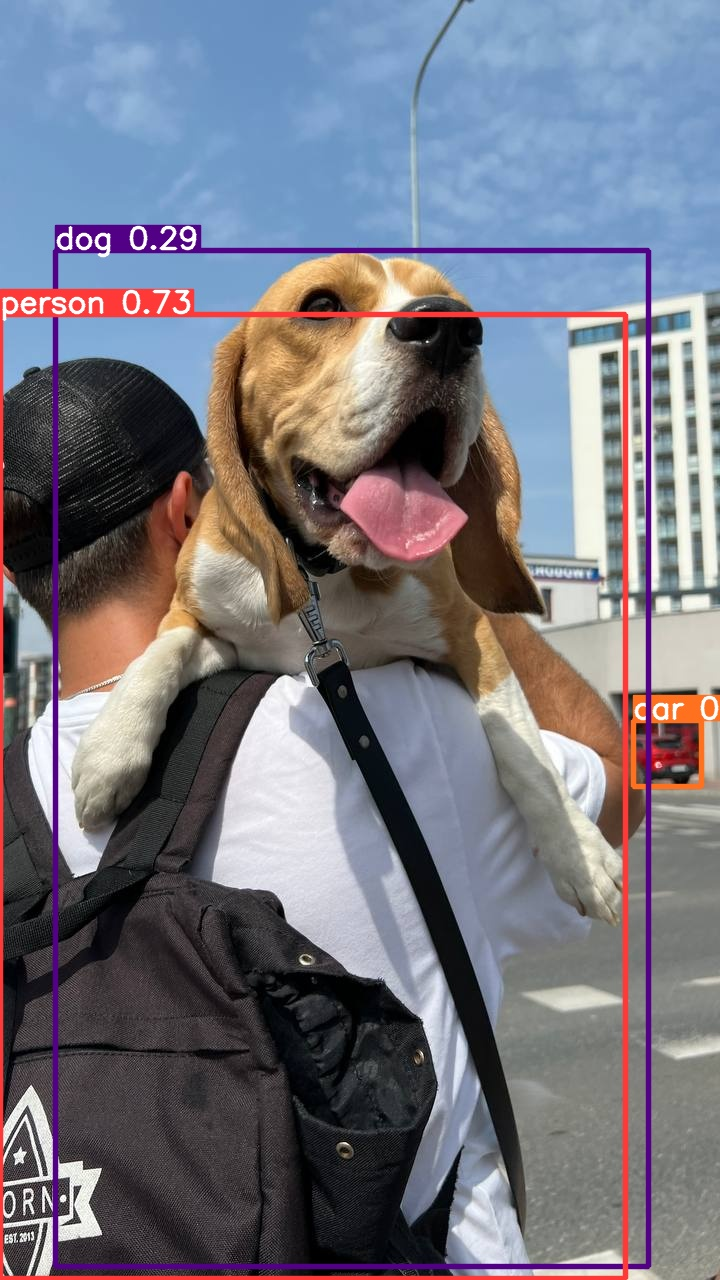

In [9]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True
Image(filename='runs/detect/predict/dog.jpeg', height=300)


In [3]:
model = YOLO(f'{HOME}\\yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

results[0].boxes.xyxy

results[0].boxes.conf

results[0].boxes.cls


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


tensor([ 0., 16.,  2.])

In [14]:
# Unzip the dataset
!unzip C:\\Users\\andre\\development\\pole_detection_1\\pole_detection.v1i.yolov8.zip -d C:\\Users\\andre\\development\\pole_detection_1\\dataset


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
!yolo task=detect mode=train model=yolov8s.pt 
data=C:\\Users\\andre\\development\\pole_detection_1\\datasets\\data.yaml epochs=8 imgsz=600 plots=True


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=C:\\Users\\andre\\development\\pole_detection_1\\datasets\\data.yaml, epochs=8, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

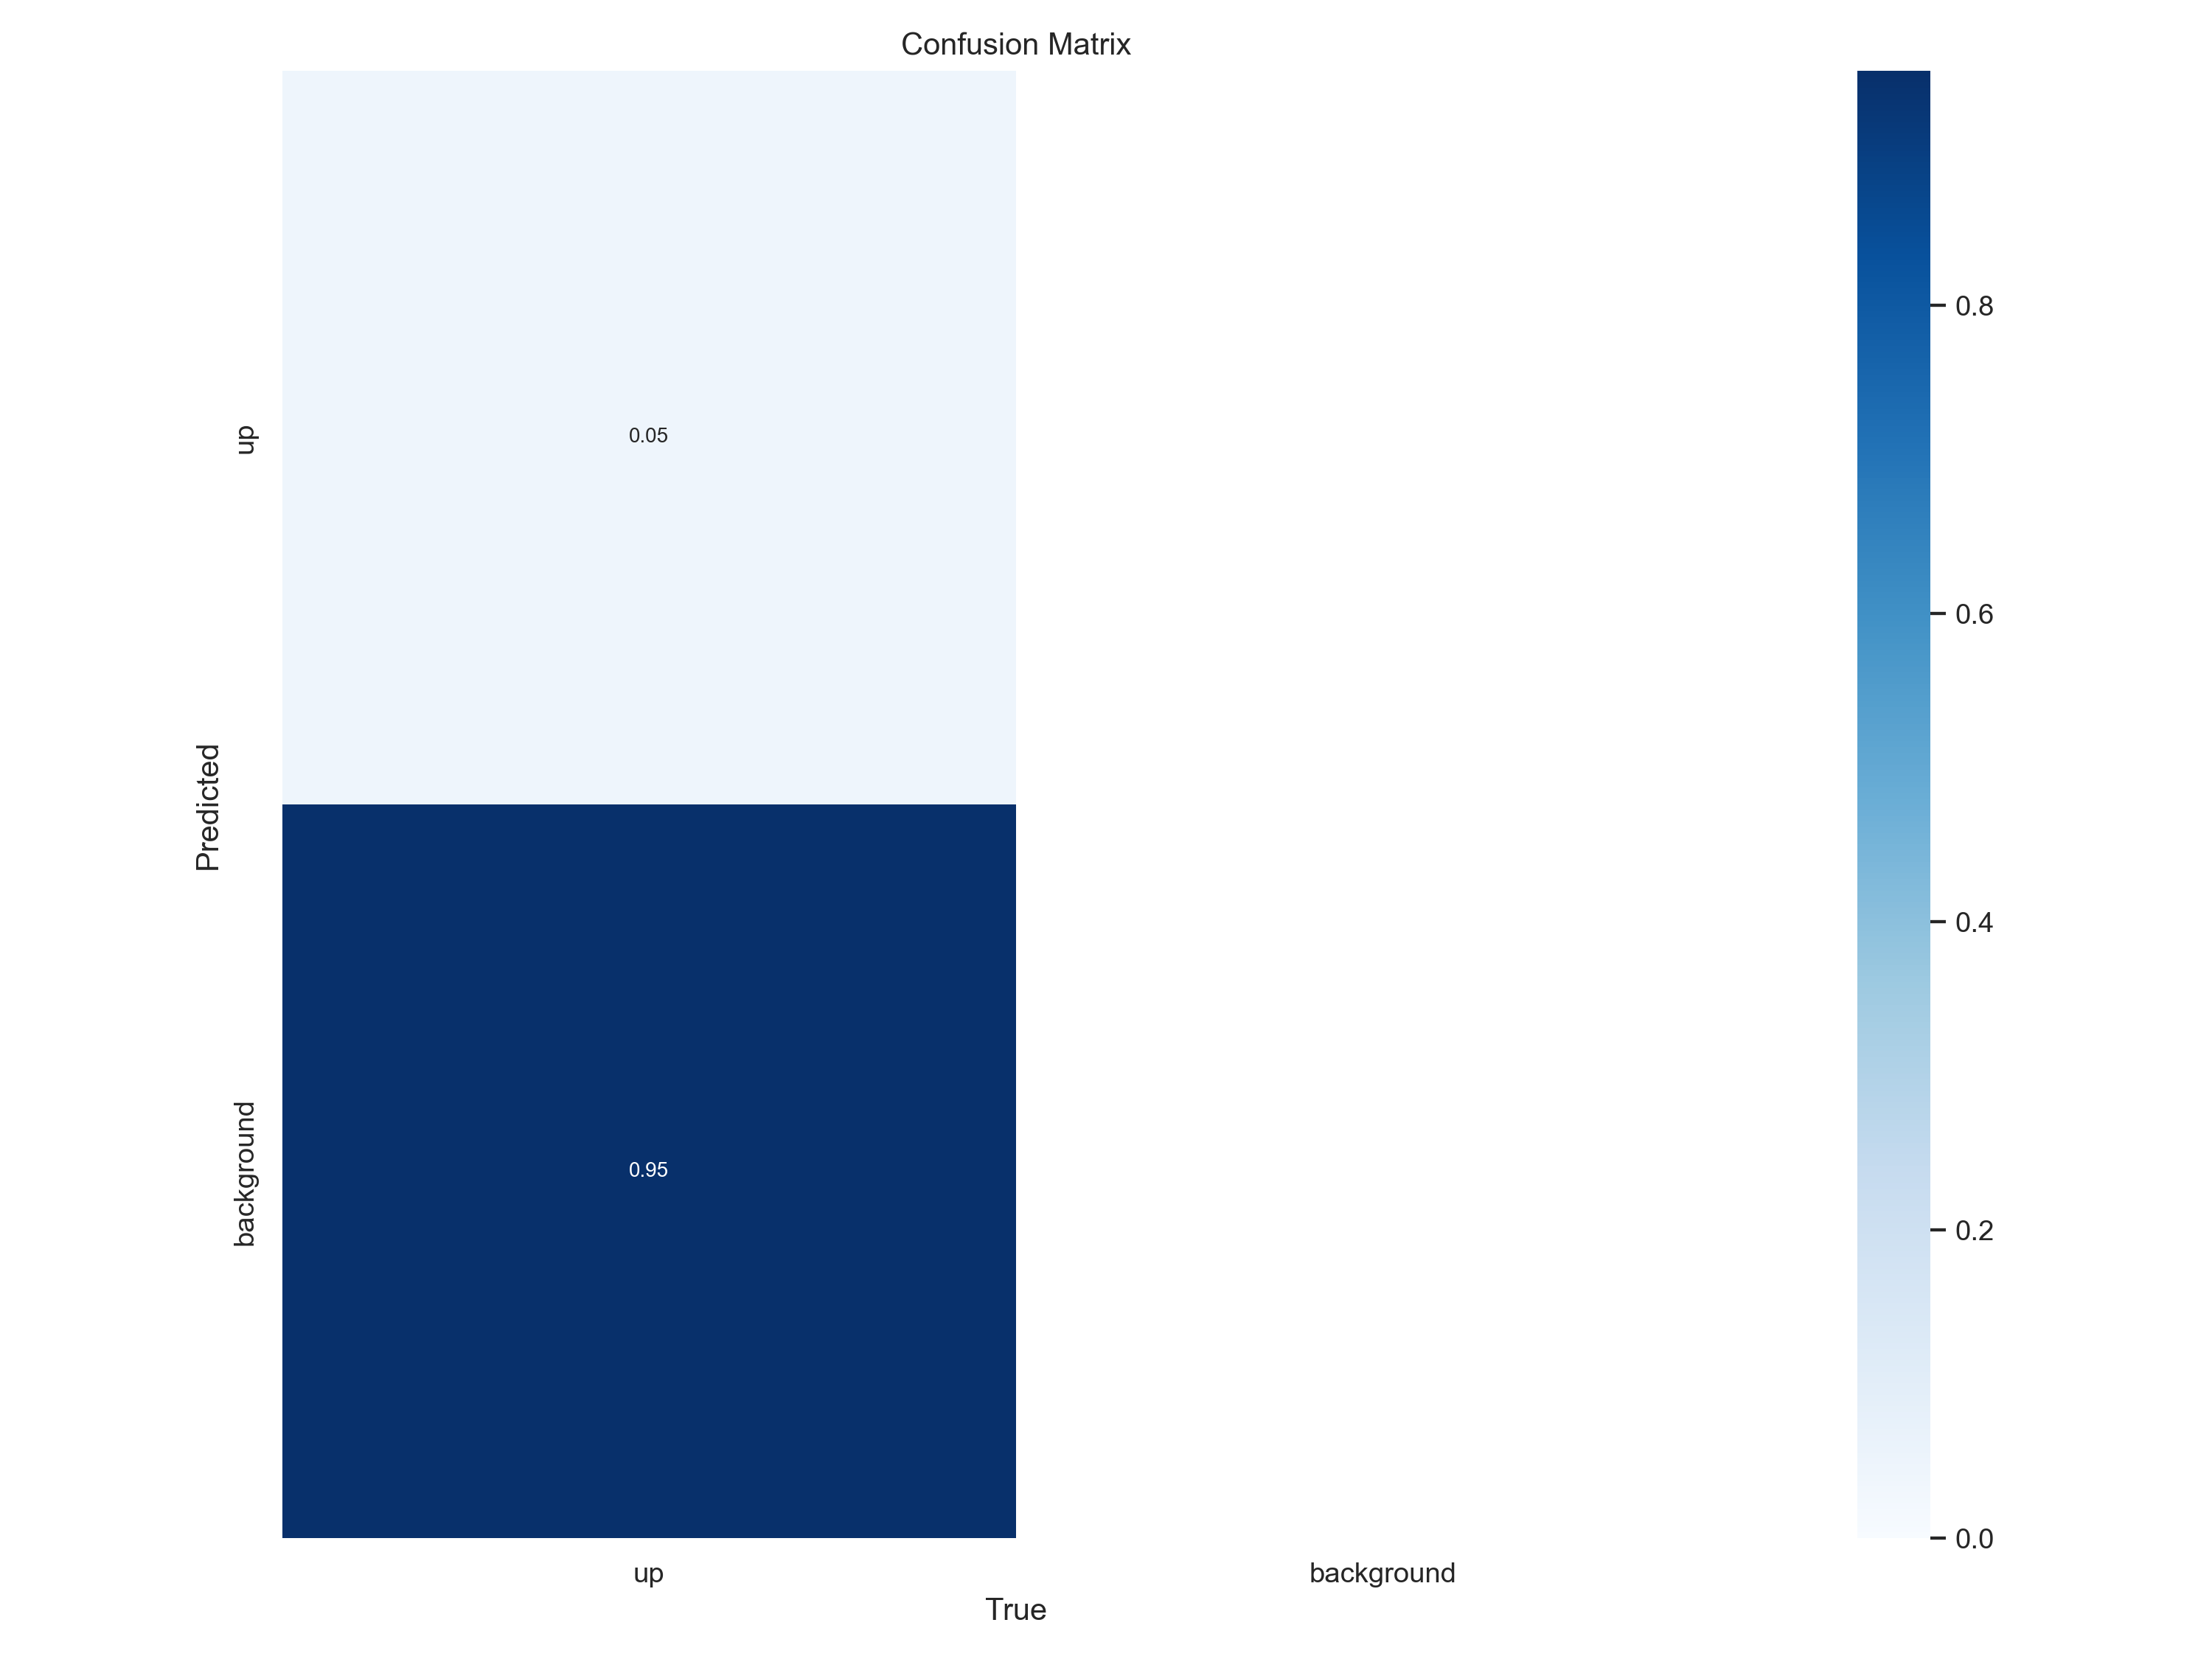

In [7]:
Image(filename=f'{HOME}\\runs\\detect\\train10\\confusion_matrix.png', width=1200)

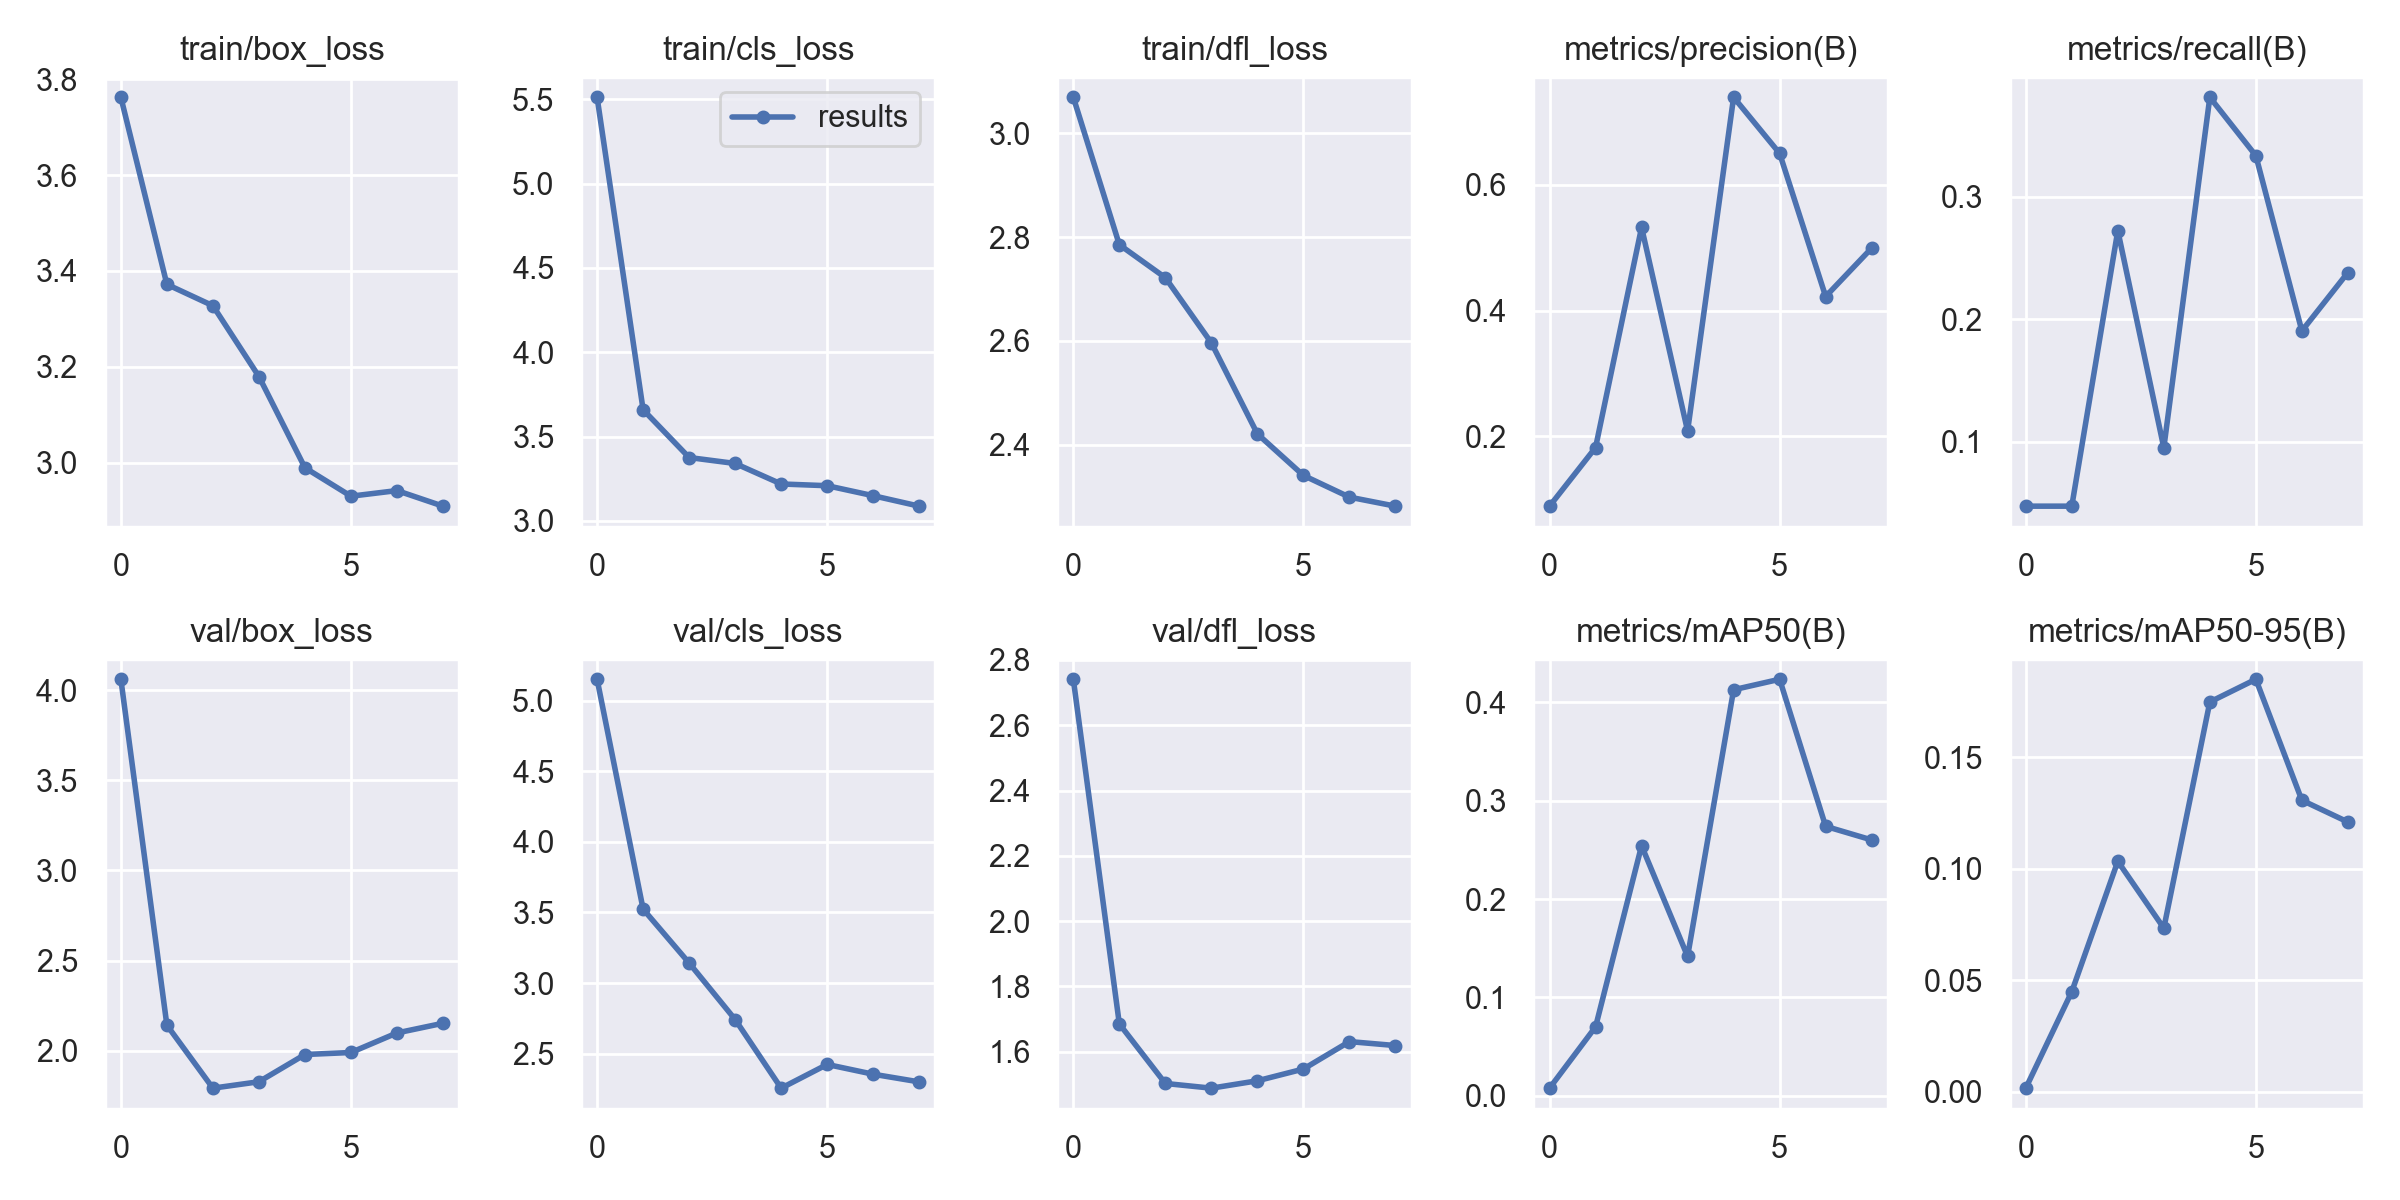

In [36]:
Image(filename=f'{HOME}\\runs\\detect\\train10\\results.png', width=1200)


C:\Users\andre\development\pole_detection_1


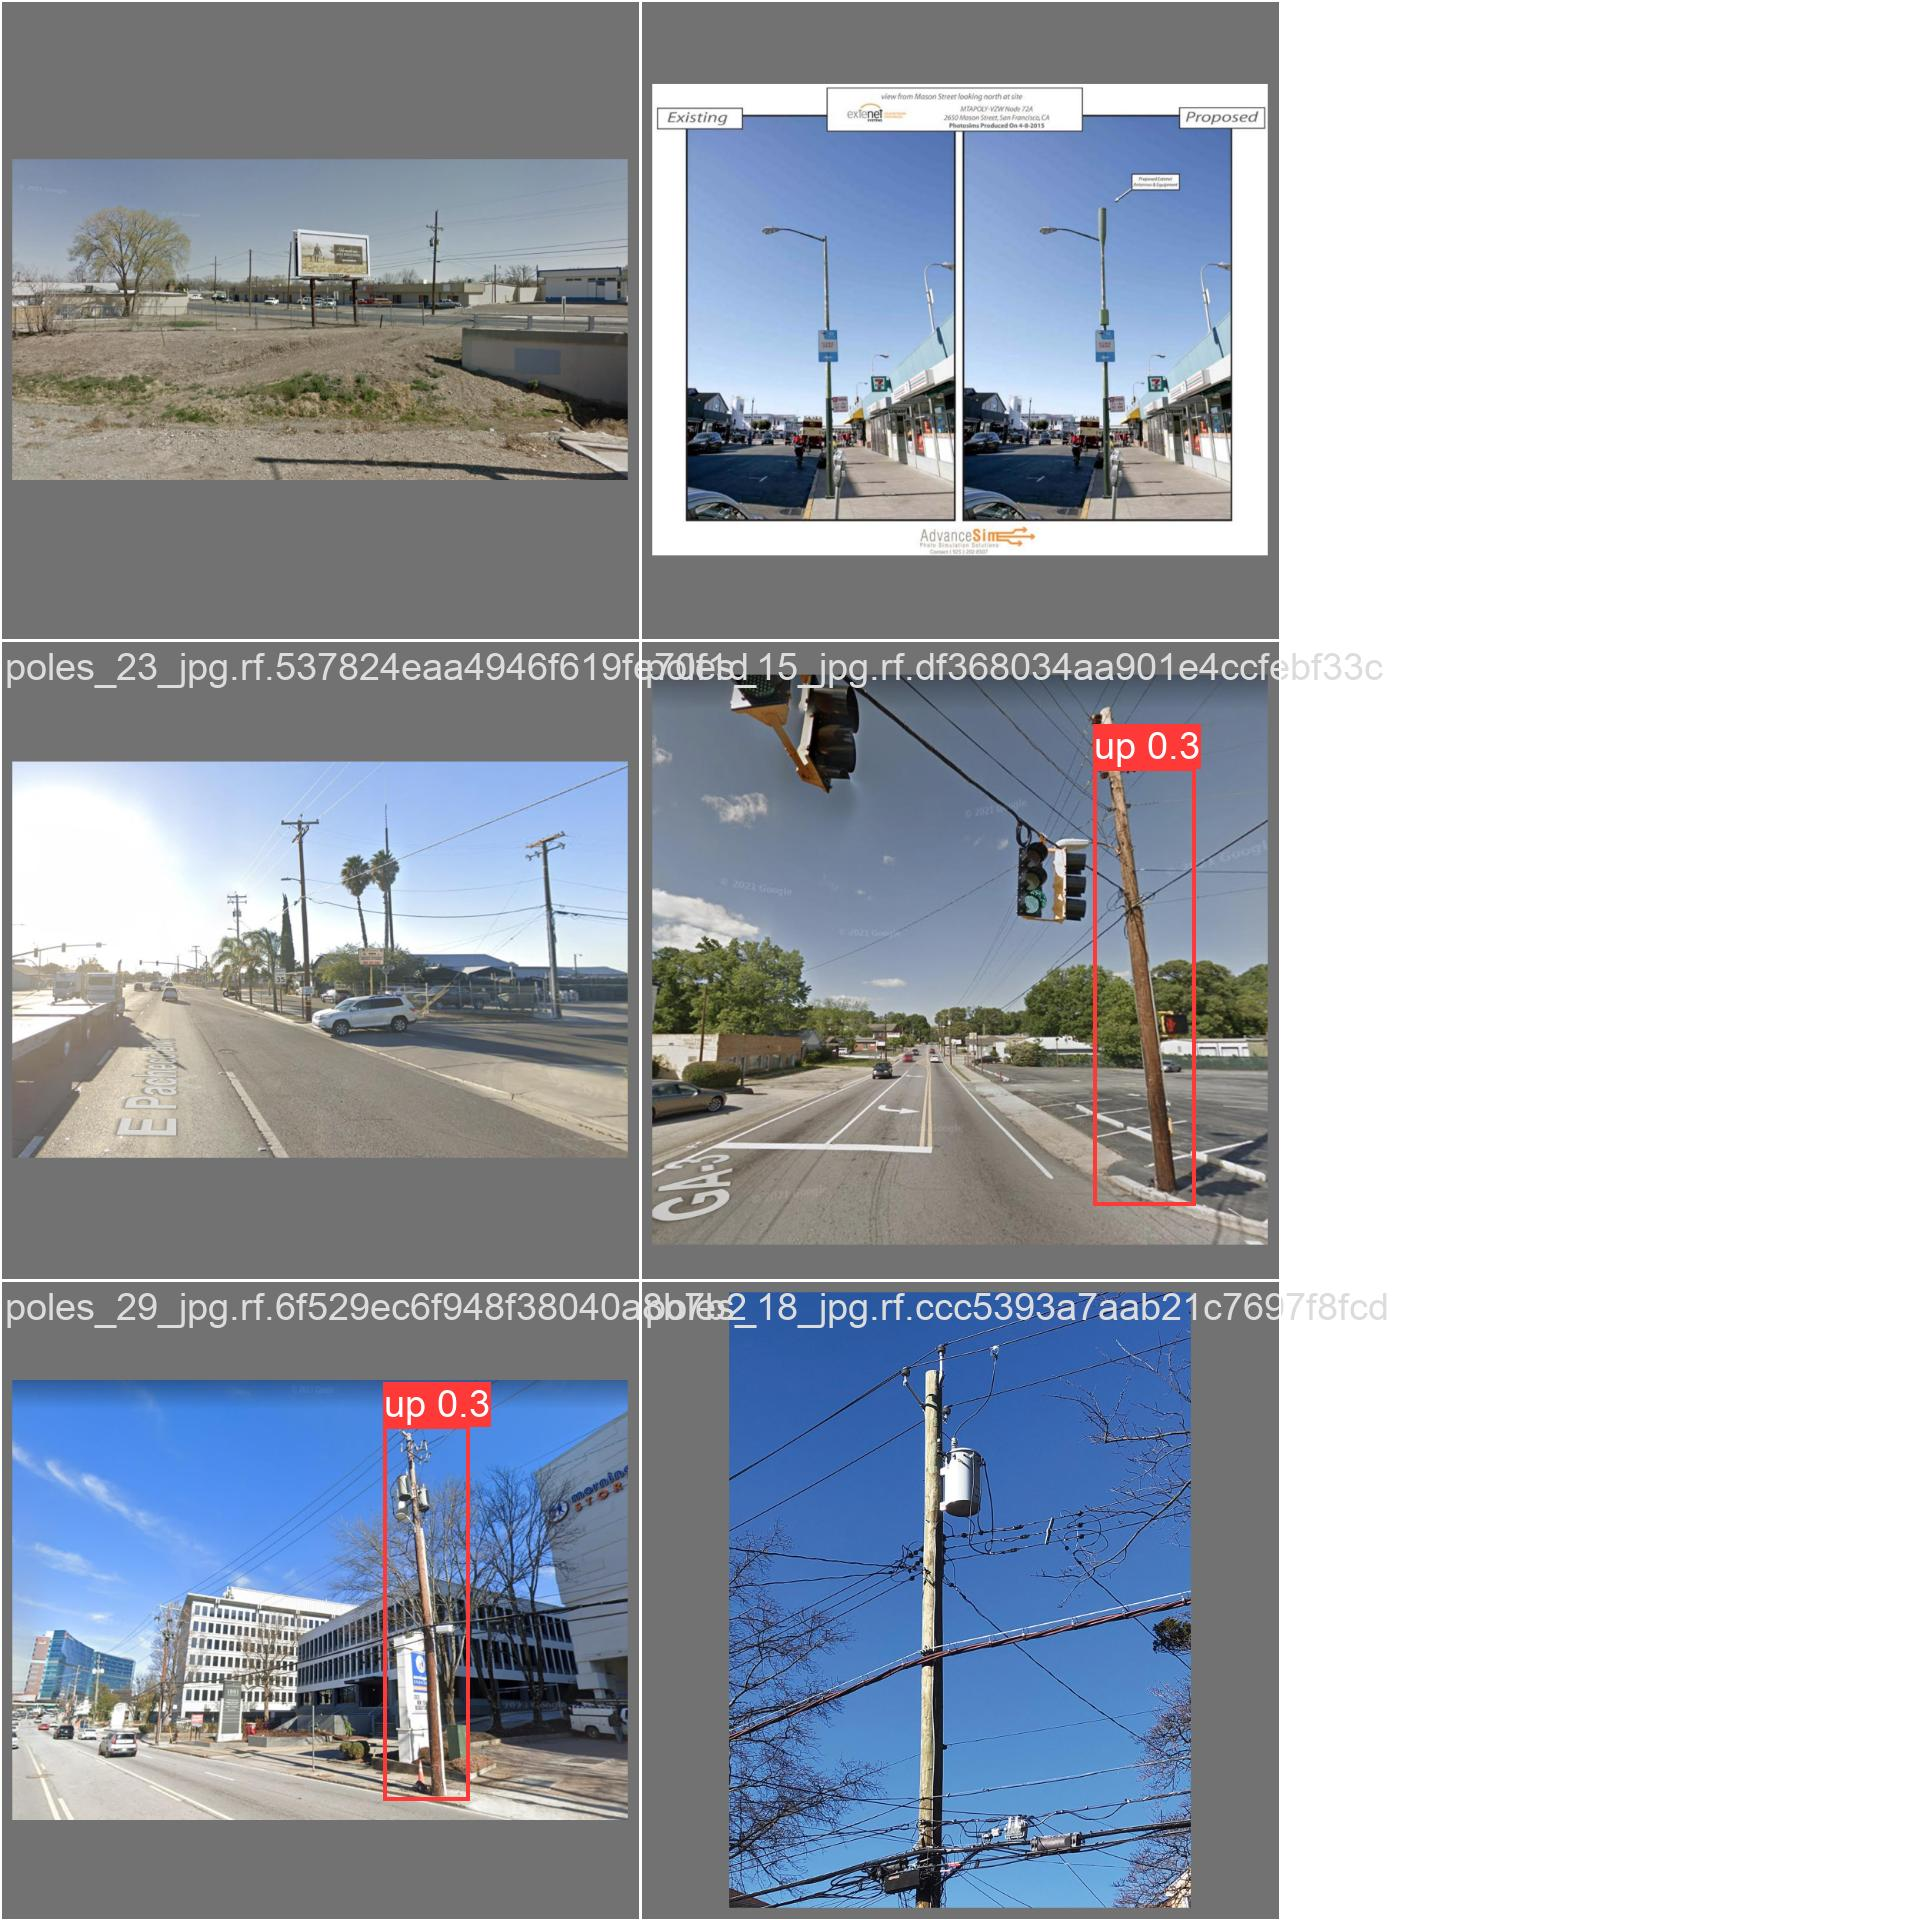

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=1200)

In [5]:
#validation:
!yolo task=detect mode=val model=C:\\Users\\andre\\development\\pole_detection_1\\runs\\detect\\val\\best.pt data=C:\\Users\\andre\\development\\pole_detection_1\\datasets\\data.yaml


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\andre\Downloads\Pole Detection\datasets\valid\labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|##########| 6/6 [00:00<?, ?it/s]
val: Scanning C:\Users\andre\Downloads\Pole Detection\datasets\valid\labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|##########| 6/6 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]WARNING  NMS time limit 0.800s exceeded

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:06<00:00,  6.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:06<00:00,  6.89s/it]
OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
OMP: Hint

In [45]:
#Perform inference:
!yolo task=detect mode=predict model=C:\\Users\\andre\\development\\pole_detection_1\\runs\\detect\\train10\\weights\\best.pt conf=0.25 source=C:\\Users\\andre\\development\\pole_detection_1\\datasets\\test\\images save=True


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_19_jpg.rf.f7f805efbb7eb9c2f86c4cd50930ecc3.jpg: 384x608 200.3ms
image 2/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_26_jpg.rf.822831fc9483e2de29fa107dfb9b7ef1.jpg: 288x608 139.2ms
image 3/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_58_jpg.rf.675b087fb7cd9e819d65c4eb698e225f.jpg: 384x608 189.3ms
image 4/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_65_jpg.rf.29bd34bbf64be884039a54e28d05afa3.jpg: 384x608 174.6ms
image 5/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_67_jpg.rf.213d4d4e1c183aaebc540247026ab402.jpg: 608x608 329.2ms
image 6/6 C:\Users\andre\development\pole_detection_1\datasets\test\images\poles_7_jpg.rf.64c77f5d5e4fbfef82368631012ca6f5.jpg: 608x480

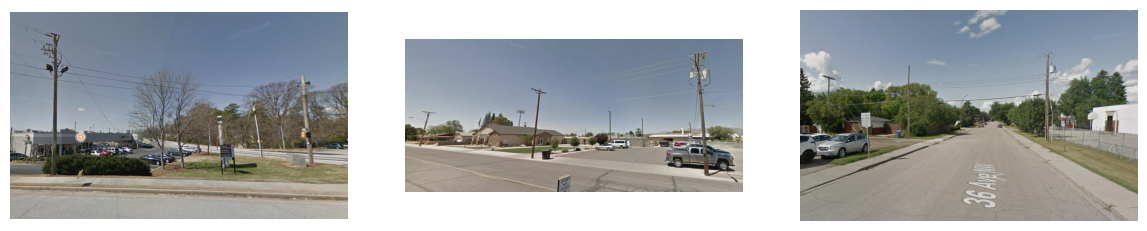

        1 file(s) copied.


In [55]:
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_paths = glob.glob(f'{HOME}\\runs\\detect\\predict9\\*.jpg')[:3]

fig, axes = plt.subplots(1, len(image_paths), figsize=(12, 12))
fig.tight_layout()

for idx, image_path in enumerate(image_paths):
    img = imread(image_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')

plt.show()


# # Save the best model
!copy C:\\Users\\andre\\development\\pole_detection_1\\runs\\detect\\train10\\weights\\best.pt C:\\Users\\andre\\development\\pole_detection_1\\


In [1]:
!jupyter nbconvert --to script --output C:\\Users\\andre\\Downloads\\run_to_toPy.py run_1.ipynb


[NbConvertApp] Converting notebook run_1.ipynb to script
[NbConvertApp] Writing 2936 bytes to C:\Users\andre\Downloads\run_to_toPy.py.py


In [6]:

import os
import nbconvert
from nbconvert import ScriptExporter

def remove_hash_lines_and_blank_lines(code):
    lines = code.split('\n')
    new_lines = [line for line in lines if not line.strip().startswith('#') and line.strip()]
    return '\n'.join(new_lines)

input_file = 'run_1.ipynb'
output_file = 'C:\\Users\\andre\\Downloads\\run_to_toPy_no_comments.py'

# Export the notebook to a script
exporter = ScriptExporter()
script, _ = exporter.from_filename(input_file)

# Remove lines starting with "#" and blank lines, then write the result to a new file
clean_code = remove_hash_lines_and_blank_lines(script)

with open(output_file, 'w') as f:
    f.write(clean_code)


In [ ]:
csv_path_1 = 'C:\\Users\\andre\\development\\pole_detection_2\\runs\\detect\\train11\\results.csv'
csv_path_2 = 'C:\\Users\\andre\\development\\pole_detection_1\\runs\\detect\\train10\\results.csv'
csv_path_3 = 'C:\\Users\\andre\\Downloads\\Pole Detection\\runs\\detect\\train6\\results.csv'

In [13]:
import pandas as pd

# Load the results CSV file into a DataFrame
results_df = pd.read_csv('C:\\Users\\andre\\development\\pole_detection_1\\runs\\detect\\train10\\results.csv')

# Calculate the average precision and recall
avg_precision = results_df.iloc[1:, 4].astype(float).mean().round(3)
avg_recall = results_df.iloc[1:, 5].astype(float).mean().round(3)
mAP50 = results_df.iloc[1:, 6].astype(float).mean().round(3)
mAP50_95 = results_df.iloc[1:, 7].astype(float).mean().round(3)

# Print the results
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"mAP50: {mAP50}")
print(f"mAP50_95: {mAP50_95}")


Average Precision: 0.462
Average Recall: 0.223
mAP50: 0.262
mAP50_95: 0.119
